In [41]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Load Nielsen table

In [42]:
#Load Nielsen table
NielsenKey = pd.read_excel("../../Downloads/journal.pbio.0030170.sd001.XLS")
NielsenKey.head()

,Gene,ENS ref,refseq match,gene symbol,# nucleotides,log likelihood dN/dS >= 0,log likelihood dN/dS=1,p-value for likelihood ratio test of dN/dS=1 versus dN/dS > 1. Test not performed for data genes with 2 mutations or less or less than 50 codons. p=1 indicates that dN/dS < 1.,included in restrictive data set?
0,HC1,ENSG00000173275,NM_152695,FLJ23614,1344,-1815.840,-1816.840,1,yes
1,HC2,NaN,XM_045283,NaN,477,-635.394,-635.745,NaN,no
2,HC3,ENSG00000082898,NM_003400,XPO1,1377,-1841.790,-1845.380,1,yes
3,HC4,ENSG00000132153,"NM_014966,NM_138615",DDX30,2718,-3595.940,-3603.100,1,yes
4,HC5,ENSG00000174417,NM_003301,TRHR,1185,-1626.170,-1632.150,1,yes


In [43]:
#dropping columns that we don't need 
NielsenKey = NielsenKey[['Gene','gene symbol','# nucleotides', 'included in restrictive data set?']]
#dropping rows with Na in gene symbol
print NielsenKey.shape, "shape before NAs dropped"
NielsenKey = NielsenKey.dropna(subset=["gene symbol"])
print NielsenKey.shape, "shape after NAs dropped"
#(We decide not to remove duplicates because we have proxy of mutation rate for all pieces)
#NielsenKey = NielsenKey.drop_duplicates(subset = 'gene symbol', keep=False)
#print NielsenKey.shape, "shape after genes with duplicate names dropped"
NielsenKey.head()

(20362, 4) shape before NAs dropped
(12887, 4) shape after NAs dropped


,Gene,gene symbol,# nucleotides,included in restrictive data set?
0,HC1,FLJ23614,1344,yes
2,HC3,XPO1,1377,yes
3,HC4,DDX30,2718,yes
4,HC5,TRHR,1185,yes
5,HC6,ATP6V1C1,1107,yes


Load Cassa table

In [85]:
CassaTable = pd.read_excel("../../Downloads/Leandra.xlsx")
CassaTable.columns = ['transcript', 'gene symbol', 'chr', 'n_exons', 'tx_start', 'tx_end','bp', 'mu_syn', 'mu_mis','mu_lof']
print CassaTable.shape
#CassaTable.drop_duplicates(subset = "gene symbol", keep =False)
#print CassaTable.shape
CassaTable.head()

(18225, 10)


,transcript,gene symbol,chr,n_exons,tx_start,tx_end,bp,mu_syn,mu_mis,mu_lof
0,ENST00000379370.2,AGRN,1,36,955552,990361,6138,0.000055,0.000102,4.848279e-06
1,ENST00000327044.6,NOC2L,1,19,880073,894620,2250,0.000014,0.000029,2.065329e-06
2,ENST00000379198.2,B3GALT6,1,1,1167658,1168648,990,0.000014,0.000024,4.561960e-07
3,ENST00000421241.2,C1orf159,1,8,1018272,1026923,597,0.000005,0.000010,5.878979e-07
4,ENST00000379389.4,ISG15,1,2,948953,949858,498,0.000004,0.000007,2.358722e-07


Next, we check to see how mu_syn and mu_mis are related to each other.  mu_syn is about 45% of mu_mis.    This is a little bit less than a  1 to 2 ratio.

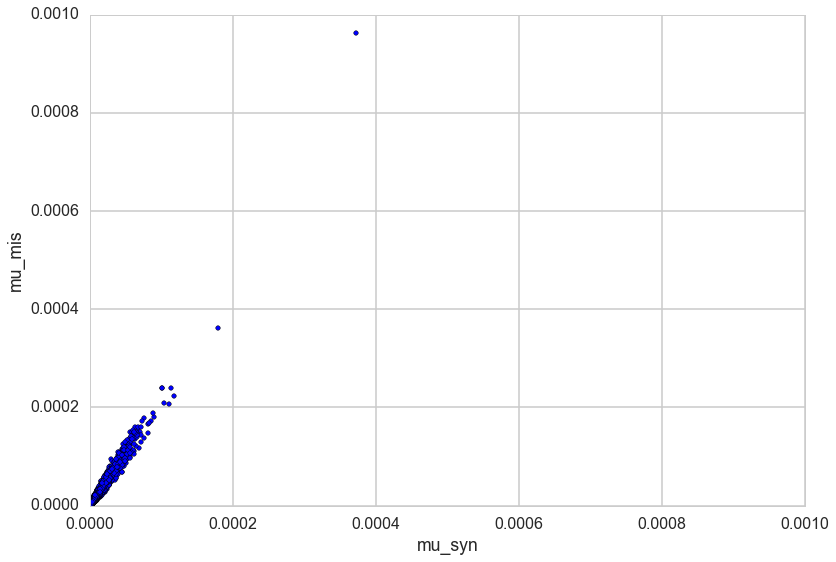

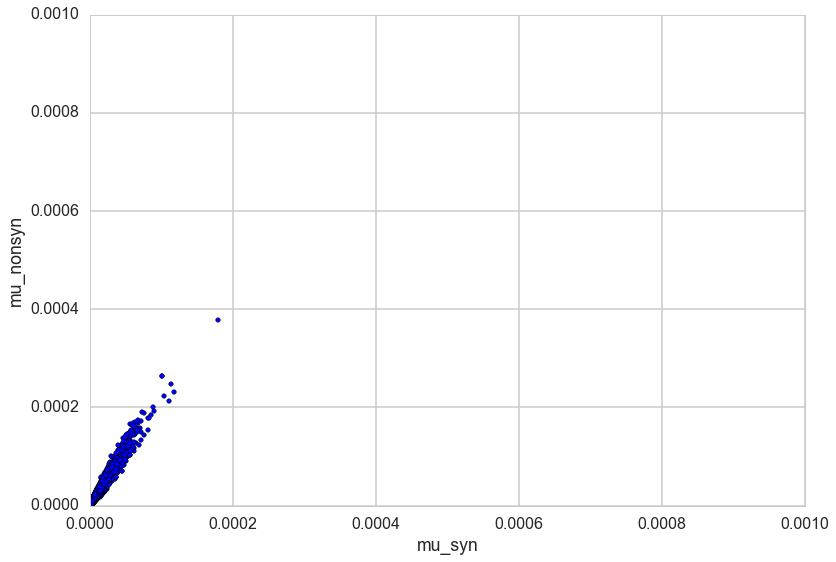

In [89]:
CassaTable["mu_non_syn"] = CassaTable["mu_mis"] + CassaTable["mu_lof"]

_=plt.scatter(CassaTable.mu_syn, CassaTable.mu_mis)
plt.ylim(0,0.001)
plt.xlim(0,0.001)
plt.xlabel("mu_syn")
plt.ylabel("mu_mis")
plt.show()

plt.figure()
_=plt.scatter(CassaTable.mu_syn, CassaTable.mu_non_syn)
plt.ylim(0,0.001)
plt.xlim(0,0.001)
plt.xlabel("mu_syn")
plt.ylabel("mu_nonsyn")
plt.show()



In [87]:
import statsmodels.formula.api as sm
result = sm.ols(formula="mu_syn ~ 0 + mu_non_syn", data=CassaTable).fit()
print result.params
print result.summary()

mu_non_syn    0.416054
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 mu_syn   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 8.229e+05
Date:                Tue, 19 Apr 2016   Prob (F-statistic):               0.00
Time:                        15:28:52   Log-Likelihood:             2.1583e+05
No. Observations:               18225   AIC:                        -4.317e+05
Df Residuals:                   18224   BIC:                        -4.316e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
mu_non_syn    

Keep only rows in both tables that have info about same genes. Scatter number of base pairs from both datasets.

In [47]:
Merged = pd.merge(NielsenKey, CassaTable, on = ['gene symbol'])
print Merged.shape
Merged.head()

(7691, 13)


,Gene,gene symbol,# nucleotides,included in restrictive data set?,transcript,chr,n_exons,tx_start,tx_end,bp,mu_syn,mu_mis,mu_lof
0,HC3,XPO1,1377,yes,ENST00000401558.2,2,24,61705954,61761032,3216,0.000010,0.000026,2.820521e-06
1,HC5,TRHR,1185,yes,ENST00000518632.1,8,2,110099741,110131684,1197,0.000004,0.000009,5.842953e-07
2,HC6,ATP6V1C1,1107,yes,ENST00000395862.3,8,12,104053064,104080975,1149,0.000004,0.000009,1.228297e-06
3,HC7,KCNV1,1356,yes,ENST00000524391.1,8,3,110980316,110986617,1503,0.000009,0.000018,7.860640e-07
4,HC8,RIMS2,2253,yes,ENST00000406091.3,8,24,104513114,105264048,4050,0.000014,0.000041,4.881915e-06


In [48]:
#Deleting dataframes that were used for pre-processing
del NielsenKey
del CassaTable

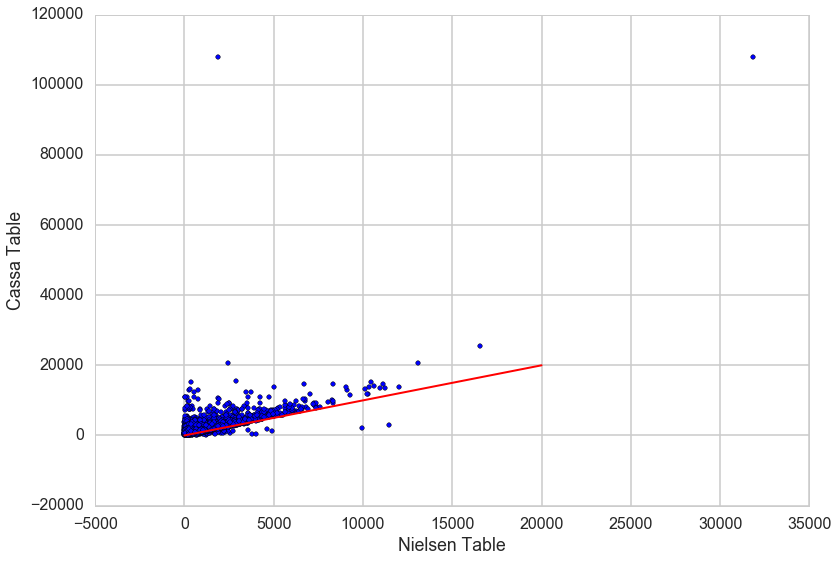

In [49]:
plt.scatter(Merged['# nucleotides'], Merged['bp'])
plt.xlabel("Nielsen Table")
plt.ylabel("Cassa Table")
plt.plot([0, 20000], [0, 20000], color='red', linestyle='-', linewidth=2)

It's okay that the number of base pairs for each pair, cause you only need the estimates of mu from the cassa dataset.  Regardless, we remove the outlying points from the table, as well as any points where the number of base pairs is too small.

In [50]:
Merged=Merged[Merged['bp'] < 20000]
Merged=Merged[Merged['bp'] > 50]
Merged = Merged[Merged['# nucleotides'] > 50]

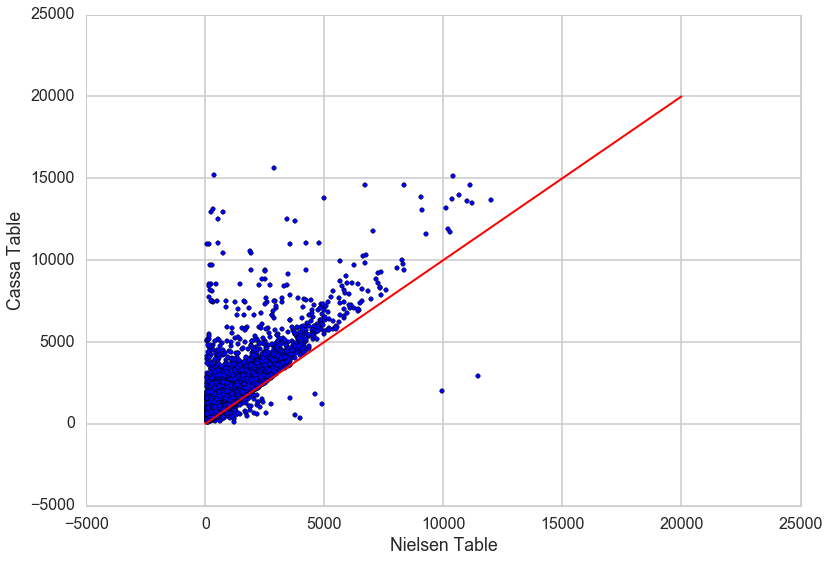

In [51]:
_=plt.scatter(Merged['# nucleotides'], Merged['bp'])
plt.xlabel("Nielsen Table")
plt.ylabel("Cassa Table")
plt.plot([0, 20000], [0, 20000], color='red', linestyle='-', linewidth=2)

Add up different mutations rates

In [52]:
Merged["mu"]=Merged["mu_syn"] + Merged["mu_lof"] + Merged["mu_mis"]
Merged.head()

,Gene,gene symbol,# nucleotides,included in restrictive data set?,transcript,chr,n_exons,tx_start,tx_end,bp,mu_syn,mu_mis,mu_lof,mu
0,HC3,XPO1,1377,yes,ENST00000401558.2,2,24,61705954,61761032,3216,0.000010,0.000026,2.820521e-06,0.000039
1,HC5,TRHR,1185,yes,ENST00000518632.1,8,2,110099741,110131684,1197,0.000004,0.000009,5.842953e-07,0.000014
2,HC6,ATP6V1C1,1107,yes,ENST00000395862.3,8,12,104053064,104080975,1149,0.000004,0.000009,1.228297e-06,0.000014
3,HC7,KCNV1,1356,yes,ENST00000524391.1,8,3,110980316,110986617,1503,0.000009,0.000018,7.860640e-07,0.000028
4,HC8,RIMS2,2253,yes,ENST00000406091.3,8,24,104513114,105264048,4050,0.000014,0.000041,4.881915e-06,0.000060


Figure out if this is mu per nucleotide or mu per group of nucleotides

(0, 20000)

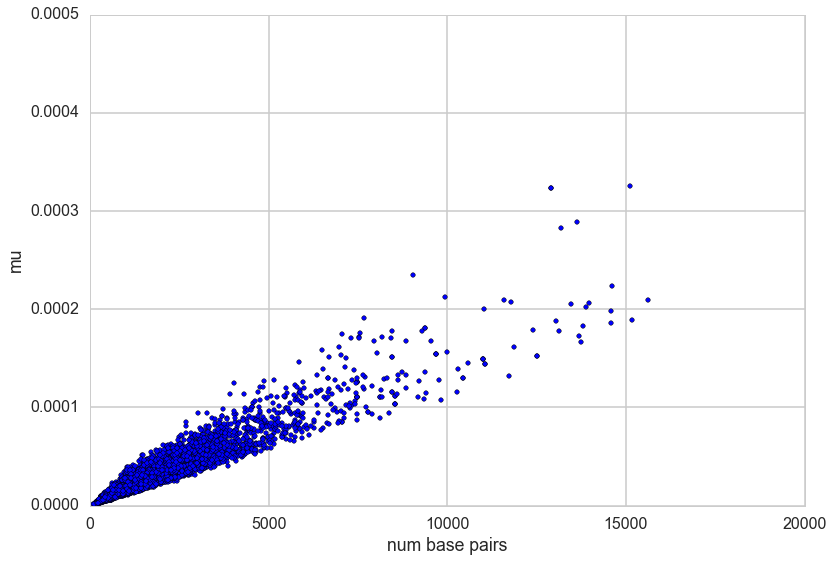

In [53]:
plt.scatter(Merged["bp"],Merged["mu"])
plt.xlabel("num base pairs")
plt.ylabel("mu")
plt.ylim([0,0.0005])
plt.xlim([0,20000])

Clearly the mu has to be for the gene as a whole, not for each particular nucleotide in the gen

We now create a "per nucleotide mu"

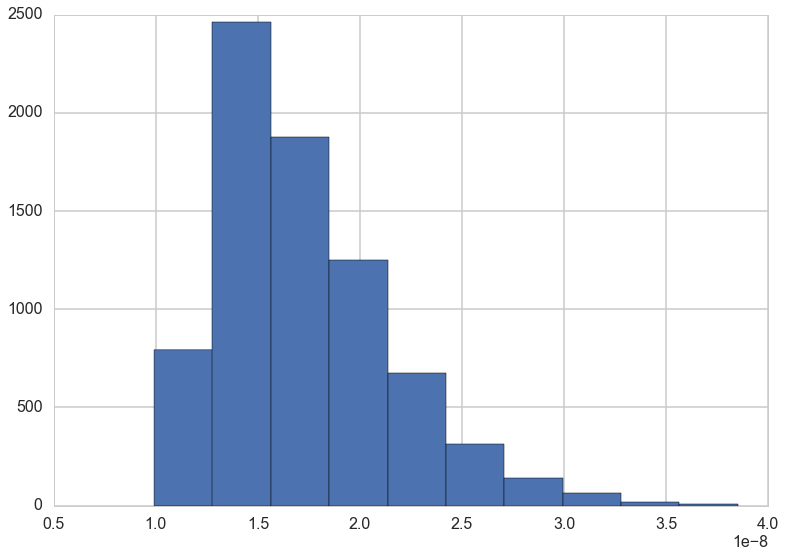

In [54]:
Merged["mu_per_nucleotide"]=Merged["mu"]/Merged["bp"]
_=plt.hist(Merged["mu_per_nucleotide"])

Find segments of genes that all have roughly similar mu*L.  To do this, first multiply mu_per_nucleotide by # nucleotides.  then choose a cutoff. 

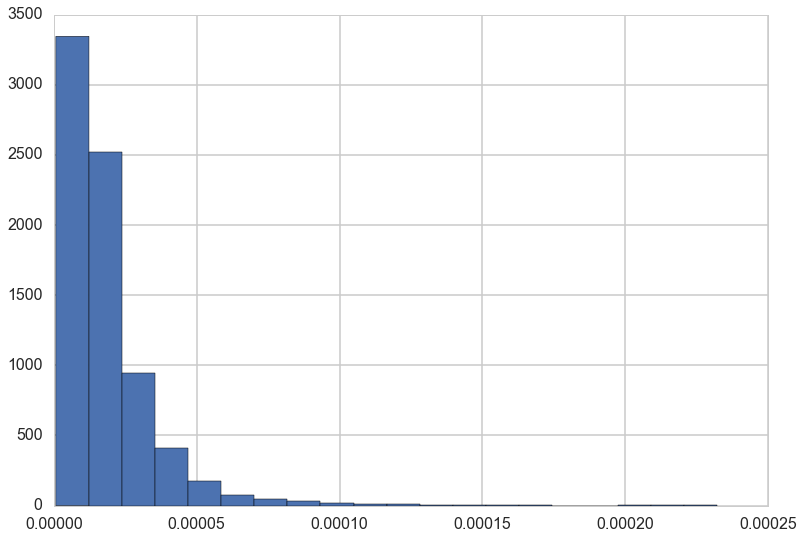

In [55]:
_=plt.hist(Merged["mu_per_nucleotide"]*Merged["# nucleotides"], bins=20)

We choose 0.00001 as a cutoff

In [56]:
cutoff = 0.00001
Merged_muL_greater_than_cutoff = Merged[Merged["mu_per_nucleotide"]*Merged["# nucleotides"]>=cutoff]
Merged_muL_greater_than_cutoff.shape

(4959, 15)

In [57]:
Merged_muL_greater_than_cutoff["cutoff_number_of_nucleotides"] = cutoff / Merged["mu_per_nucleotide"]
Merged_muL_greater_than_cutoff["cutoff_number_of_nucleotides"] = Merged_muL_greater_than_cutoff["cutoff_number_of_nucleotides"].apply(int)
Merged_muL_greater_than_cutoff.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Gene,gene symbol,# nucleotides,included in restrictive data set?,transcript,chr,n_exons,tx_start,tx_end,bp,mu_syn,mu_mis,mu_lof,mu,mu_per_nucleotide,cutoff_number_of_nucleotides
0,HC3,XPO1,1377,yes,ENST00000401558.2,2,24,61705954,61761032,3216,0.000010,0.000026,2.820521e-06,0.000039,1.205082e-08,829
1,HC5,TRHR,1185,yes,ENST00000518632.1,8,2,110099741,110131684,1197,0.000004,0.000009,5.842953e-07,0.000014,1.157328e-08,864
2,HC6,ATP6V1C1,1107,yes,ENST00000395862.3,8,12,104053064,104080975,1149,0.000004,0.000009,1.228297e-06,0.000014,1.260551e-08,793
3,HC7,KCNV1,1356,yes,ENST00000524391.1,8,3,110980316,110986617,1503,0.000009,0.000018,7.860640e-07,0.000028,1.847618e-08,541
4,HC8,RIMS2,2253,yes,ENST00000406091.3,8,24,104513114,105264048,4050,0.000014,0.000041,4.881915e-06,0.000060,1.483878e-08,673


Now, find sites that are located far enough from one another

In [58]:
#How much info do we have per chromosome
Merged_muL_greater_than_cutoff.groupby('chr').Gene.count()

chr
1     477
2     341
3     287
4     164
5     240
6     298
7     215
8     158
9     192
10    187
11    303
12    258
13     93
14    166
15    136
16    192
17    291
18     78
19    340
20    160
21     64
22    129
X     189
Y       1
Name: Gene, dtype: int64

189


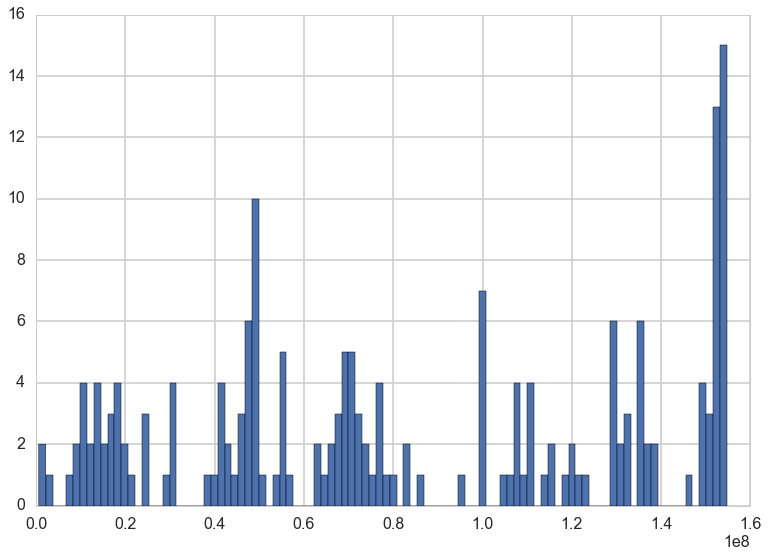

In [59]:
#histogram of start position on the X chromo
Merged_muL_greater_than_cutoff[Merged_muL_greater_than_cutoff.chr =="X"].tx_start.hist(bins=100)
print len(Merged_muL_greater_than_cutoff[Merged_muL_greater_than_cutoff.chr =="X"].tx_start)

## Create a dataframe just containing independent loci 

We are going to assume that sites that are separated by 1 megabase are independent: http://biorxiv.org/content/biorxiv/early/2015/09/16/020255.full.pdf and Loh et al 2015
    

In [60]:
#We figure out those that are separated enough for chromosome 18 -- we will automate this in a for loop later

#Sort data frame by t_start value
sorted_df=Merged_muL_greater_than_cutoff[Merged_muL_greater_than_cutoff.chr ==18].sort_values(by="tx_start")

#Find elements that are separated by at least 1Mb
last_tx = -1000000
for i, row in sorted_df.iterrows():
    if row.tx_start - last_tx > 1000000:
        #last_tx = row.tx_end  
        last_tx = row.tx_start + row.cutoff_number_of_nucleotides
        sorted_df.set_value(i,'separated_enough',True)
    else:
        sorted_df.set_value(i,'separated_enough',False)

#about half of the values were kept
print sorted_df.shape, sorted_df[sorted_df.separated_enough].shape

(78, 17) (33, 17)


In [61]:
def return_dataframe_with_independent_loci(chromosome, Merged_muL_greater_than_cutoff):
    #Sort data frame by t_start value
    sorted_df=Merged_muL_greater_than_cutoff[Merged_muL_greater_than_cutoff.chr ==chromosome].sort_values(by="tx_start")

    #Find elements that are separated by at least 1Mb
    last_tx = -1000000
    for i, row in sorted_df.iterrows():
        if row.tx_start - last_tx > 1000000:
            last_tx = row.tx_end        
            sorted_df.set_value(i,'separated_enough',True)
        else:
            sorted_df.set_value(i,'separated_enough',False)

    print "chr, size of original dataset, size of dataset with only indep loci"
    print chromosome, sorted_df.shape, sorted_df[sorted_df.separated_enough].shape
    
    return sorted_df[sorted_df.separated_enough]

list_of_dataframes_indep_loci = []
for chromosome in Merged_muL_greater_than_cutoff.chr.unique():
    list_of_dataframes_indep_loci.append(return_dataframe_with_independent_loci(chromosome, Merged_muL_greater_than_cutoff))
    
dataframe_indep_loci = pd.concat(list_of_dataframes_indep_loci)

print "chr, size of original dataset, size of dataset with only indep loci (all chromos concatenated)"
print dataframe_indep_loci.shape

chr, size of original dataset, size of dataset with only indep loci
2 (341, 17) (109, 17)
chr, size of original dataset, size of dataset with only indep loci
8 (158, 17) (58, 17)
chr, size of original dataset, size of dataset with only indep loci
6 (298, 17) (87, 17)
chr, size of original dataset, size of dataset with only indep loci
X (189, 17) (66, 17)
chr, size of original dataset, size of dataset with only indep loci
11 (303, 17) (71, 17)
chr, size of original dataset, size of dataset with only indep loci
3 (287, 17) (88, 17)
chr, size of original dataset, size of dataset with only indep loci
16 (192, 17) (39, 17)
chr, size of original dataset, size of dataset with only indep loci
1 (477, 17) (122, 17)
chr, size of original dataset, size of dataset with only indep loci
5 (240, 17) (81, 17)
chr, size of original dataset, size of dataset with only indep loci
7 (215, 17) (68, 17)
chr, size of original dataset, size of dataset with only indep loci
12 (258, 17) (67, 17)
chr, size of ori

The data set is now of size 1380.

Plotting the old dataset (not culled to just contain indep loci) in blue, with the new dataset only containing indep loci in green on top of it.  Histogram just for the X chromo.

In [62]:
dataframe_indep_loci.head()

,Gene,gene symbol,# nucleotides,included in restrictive data set?,transcript,chr,n_exons,tx_start,tx_end,bp,mu_syn,mu_mis,mu_lof,mu,mu_per_nucleotide,cutoff_number_of_nucleotides,separated_enough
2934,HC10256,SNTG2,1131,yes,ENST00000308624.5,2,17,946682,1371246,1620,0.000010,0.000019,1.614178e-06,0.000030,1.874699e-08,533,True
2933,HC10254,TSSC1,810,yes,ENST00000382125.4,2,9,3193104,3381460,1164,0.000007,0.000014,9.656517e-07,0.000022,1.884216e-08,530,True
2172,HC6272,CPSF3,1236,yes,ENST00000238112.3,2,18,9563902,9613146,2055,0.000008,0.000019,1.819344e-06,0.000028,1.368408e-08,730,True
3841,HC12496,KCNF1,1158,yes,ENST00000295082.1,2,1,11052552,11054037,1485,0.000013,0.000023,5.128354e-07,0.000037,2.485601e-08,402,True
374,HC657,DDX1,1893,yes,ENST00000381341.2,2,26,15732057,15771030,2223,0.000007,0.000018,2.019186e-06,0.000027,1.232486e-08,811,True


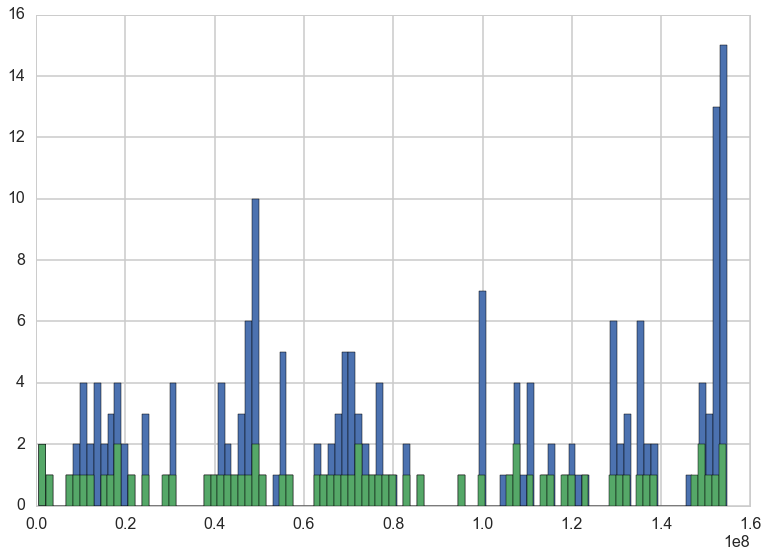

In [63]:
#old dataset
Merged_muL_greater_than_cutoff[Merged_muL_greater_than_cutoff.chr =="X"].tx_start.hist(bins=100)

#new dataset
dataframe_indep_loci[dataframe_indep_loci.chr=="X"].tx_start.hist(bins=100)

## Retrieving gene information from HC files

In [64]:
#These are the loci we will be looking up
dataframe_indep_loci.Gene.values

array([u'HC10256', u'HC10254', u'HC6272', ..., u'HC10927', u'HC8037',
       u'HC1419'], dtype=object)

In [65]:
#show what one of these files looks like
fp = open("../../Downloads/nielsen_alignments/HC18675.fa", "r")
for ele in fp.readlines():
    print ele
fp.close()

>human 12807 bp

NAAATTCCCGGAGACCAGGTTGTCAGTGTGGTGTTCATCAAGGAGCTGGATGGCTGGGTT

TTTGTGGAGCTGGATGTGGGCTCGGAAGGGAATGCGGATGGGGCTCAGATTCAGGAGATG

CTGCTCAGGGTCATCTCCAGCGGCTCTGTGGCCTCCTACGTCACCTCTCCCCAGGGATTC

CAGTTCCGACGCCTGGGCACAGTGCCCCAGTTCCCAAGAGCCTGCACGGAGGCCGAGTTT

GCCTGCCACAGCTACAATGAGTGTGTGGCCCTGGAGTATCGCTGTGACCGGCGGCCCGAC

TGCAGGGACATGTCTGATGAGCTCAATTGTGAGGAGCCAGTCCTGGGTATCAGCCCCACA

TTCTCTCTCCTCGTGGAGACGACATCTTTACCGCCCCGGCCAGAGACAACCATCATGCGA

CAGCCACCAGTCACCCACGCTCCTCAGCCCCTGCTTCCCGGTTCCGTCANNNNNCCCCTG

CCCTGTGCGNCCCAGGAGGCCGCATGCCGCAATGGGCACTGCATCCCCAGAGACTACCTC

TGCGACGGACAGGAGGACTGCGAGGACGGCAGCGATGAGCTAGACTGTGGCCCCCCGCCA

CCCTGTGAGCCCAACGAGXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXCCACCAAGCGT

CCTGAGGAAGTGTGCGGGCCCACACAGTTCCGATGCGTCTCTACCAACATGTGCATCCCA

GCCAGCTTCCACTGTGACGAGGAGAGCGACTGTCCTGACCGGAGCGACGAGTTTGGCTGC

ATGCCCCCCCAGGTGGTGACACCTCCCCGGGAGTCCATCCAGGCTTCCCGGGGCCAGACA

GTGACCTTCACCTGCGTGGCCATTGGCGTCCCCACCCCNNTCATCAATTGGAG

In [66]:
#Find only elements that aren't "X" in either chimp or human
fp = open("../../Downloads/nielsen_alignments/HC18675.fa", "r")
a = fp.readline() #This is the '>human 1548 bp\n' type header
humans, chimps = [], []
switch = 0
while a:
    a = fp.readline()
    if 'chimp' in a :
        switch = 1
        continue
    if not switch:
        humans+=a.strip('\n')
    else:
        chimps+=a.strip('\n')
fp.close()

In [67]:
len(humans), len(chimps)

(12807, 12807)

In [68]:
#Getting all non-'X' elements
def get_non_X_elements(human_nucl, chimp_nucl):
    if (human_nucl == 'X' or chimp_nucl == 'X' or human_nucl == '?' or chimp_nucl == '?' or human_nucl == 'N' or chimp_nucl == 'N'):
        return False
    else:
        return True

is_ele_non_X = [get_non_X_elements(ele1,ele2) for ele1, ele2 in zip(humans,chimps)]
    
humans_no_X = [ele1 for ele1, is_nuc_non_X in zip(humans, is_ele_non_X) if is_nuc_non_X]
chimps_no_X = [ele1 for ele1, is_nuc_non_X in zip(chimps, is_ele_non_X) if is_nuc_non_X]

len(humans_no_X), len(chimps_no_X)
#human_nucl . intersect [get_non_X_elements(ele1,ele2) for ele1, ele2 in zip(humans,chimps)]

(10191, 10191)

In [69]:
#number of differences:
sum([ele1!=ele2 for ele1, ele2 in zip(humans_no_X, chimps_no_X)])

209

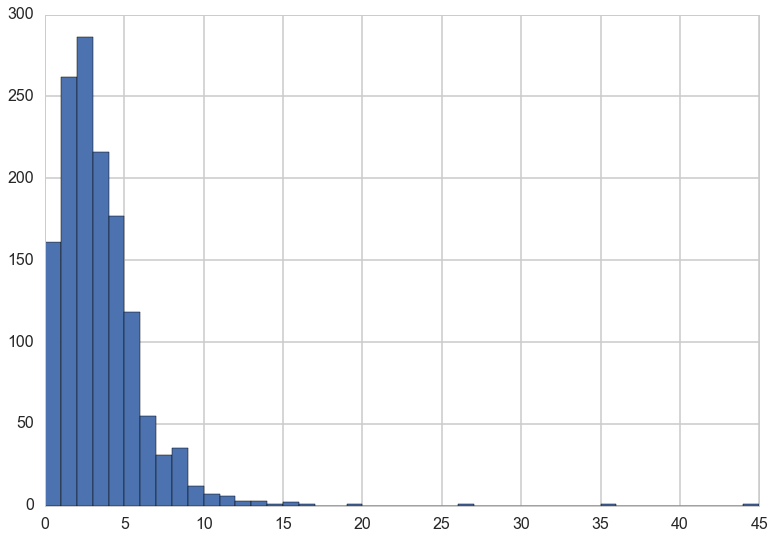

In [70]:
#Now automate the previous parts:
def print_differences_btw_human_and_chimp_seq(HC):
    #Find only elements that aren't "X" in either chimp or human
    fp = open("../../Downloads/nielsen_alignments/" + HC + ".fa", "r")
    a = fp.readline() #This is the '>human 1548 bp\n' type header
    humans, chimps = [], []
    switch = 0
    while a:
        a = fp.readline()
        if 'chimp' in a :
            switch = 1
            continue
        if not switch:
            humans+=a.strip('\n')
        else:
            chimps+=a.strip('\n')
    fp.close()
    
    is_ele_non_X = [get_non_X_elements(ele1,ele2) for ele1, ele2 in zip(humans,chimps)]
    
    humans_no_X = [ele1 for ele1, is_nuc_non_X in zip(humans, is_ele_non_X) if is_nuc_non_X]
    chimps_no_X = [ele1 for ele1, is_nuc_non_X in zip(chimps, is_ele_non_X) if is_nuc_non_X]

    #return sum([ele1!=ele2 for ele1, ele2 in zip(humans_no_X, chimps_no_X)])
    cutoff = dataframe_indep_loci[dataframe_indep_loci.Gene == HC].cutoff_number_of_nucleotides.values[0]
    return sum([ele1!=ele2 for ele1, ele2 in zip(humans_no_X[:cutoff], chimps_no_X[:cutoff])])

diffs = {}
for HC in dataframe_indep_loci.Gene.values:
    diff = print_differences_btw_human_and_chimp_seq(HC)
    
    diffs[HC]=diff

    
_ = plt.hist(diffs.values(), bins= 45)

    

In [81]:
dfa=range(20)
print dfa
dfa[2::3]
dfa[3:-3]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

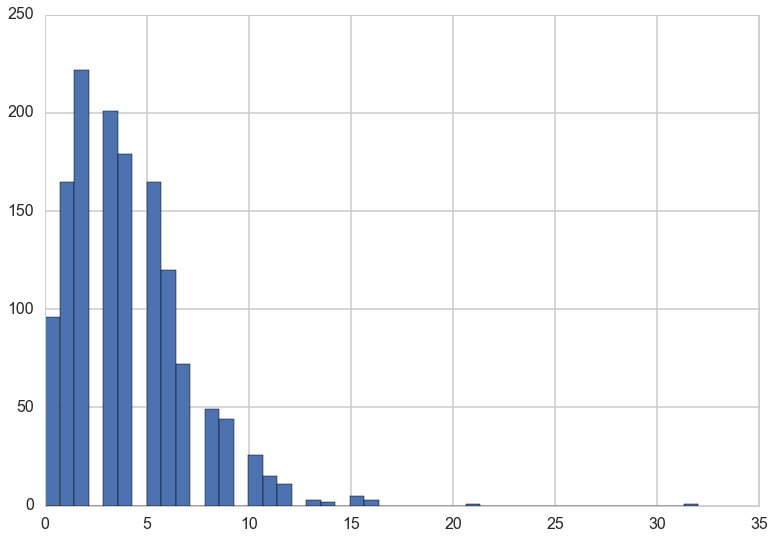

In [83]:
#2016-04-19 We only consider the last codon, which we assume to be neutral.  We also remove the start codon.

def print_differences_btw_human_and_chimp_seq_neutral(HC):
    #Find only elements that aren't "X" in either chimp or human
    fp = open("../../Downloads/nielsen_alignments/" + HC + ".fa", "r")
    a = fp.readline() #This is the '>human 1548 bp\n' type header
    humans, chimps = [], []
    switch = 0
    while a:
        a = fp.readline()
        if 'chimp' in a :
            switch = 1
            continue
        if not switch:
            humans+=a.strip('\n')
        else:
            chimps+=a.strip('\n')      
    fp.close()
    
    humans = humans[3:-3] #Removing stop and start codon
    humans_neutral = humans[2::3] #Only preserving neutral sites, or just the 3rd nucleotide sites
    chimps = chimps[3:-3] #Removing stop and start codon
    chimps_neutral = chimps[2::3] #Only preserving neutral sites, or just the 3rd nucleotide sites
    
    is_ele_non_X = [get_non_X_elements(ele1,ele2) for ele1, ele2 in zip(humans_neutral,chimps_neutral)]
    
    humans_no_X_neutral = [ele1 for ele1, is_nuc_non_X in zip(humans_neutral, is_ele_non_X) if is_nuc_non_X]
    chimps_no_X_neutral = [ele1 for ele1, is_nuc_non_X in zip(chimps_neutral, is_ele_non_X) if is_nuc_non_X]

    #return sum([ele1!=ele2 for ele1, ele2 in zip(humans_no_X, chimps_no_X)])
    cutoff = dataframe_indep_loci[dataframe_indep_loci.Gene == HC].cutoff_number_of_nucleotides.values[0]
    return sum([ele1!=ele2 for ele1, ele2 in zip(humans_no_X_neutral[:cutoff], chimps_no_X_neutral[:cutoff])])

diffs_neutral = {}
for HC in dataframe_indep_loci.Gene.values:
    diff = print_differences_btw_human_and_chimp_seq_neutral(HC)
    
    diffs_neutral[HC]=diff

    
_ = plt.hist(diffs_neutral.values(), bins= 45)

    

In [71]:
#Check where Y chromosome lies
print dataframe_indep_loci[dataframe_indep_loci.chr =="Y"]

diffs['HC1419']

       Gene gene symbol  # nucleotides included in restrictive data set?         transcript chr  n_exons  tx_start    tx_end    bp    mu_syn    mu_mis    mu_lof        mu  mu_per_nucleotide  cutoff_number_of_nucleotides separated_enough
712  HC1419      NLGN4Y            837                                no  ENST00000355905.2   Y        5  16733999  16953142  2451  0.000014  0.000028  0.000001  0.000043       1.763550e-08                           567             True


7

In [72]:
len(diffs)

1380

What gene to use?  We need a gene that has a known tmrca.  If you know chimp, human divergence, then that gives you an estimate.  I don't knwo a gene with known TMRCA.
Other thoughts: do the sex chromosomes evolve differently than the autosomes?  Can we assume that they are from the same distribution?
Also, we are assuming same mutation rate for chimps and humans.

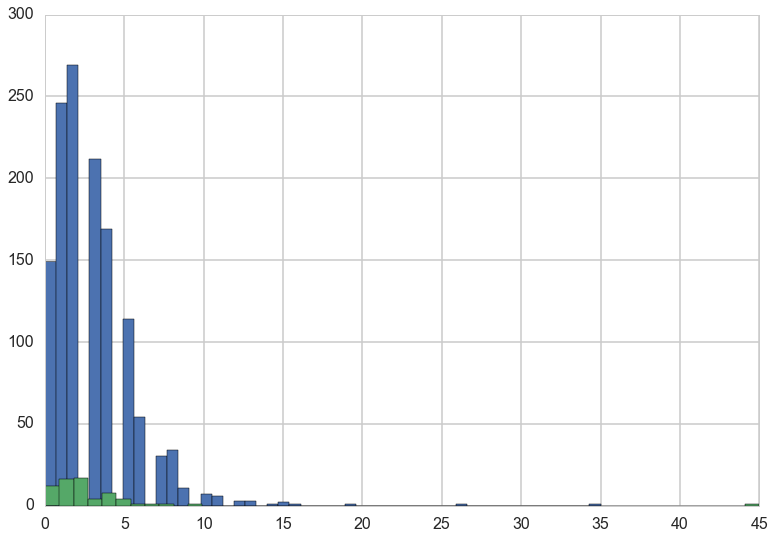

In [73]:
#add dictionary as column
dataframe_indep_loci["created_num_muts"] = dataframe_indep_loci['Gene'].map(diffs)
dataframe_indep_loci.head()

dataframe_indep_loci[dataframe_indep_loci.chr!="X"].created_num_muts.hist(bins=50)
dataframe_indep_loci[dataframe_indep_loci.chr=="X"].created_num_muts.hist(bins=50)

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5933: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 1 x 12)
  'this looks transposed (shape is %d x %d)' % x.shape[::-1])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110c4e950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11289da90>]], dtype=object)

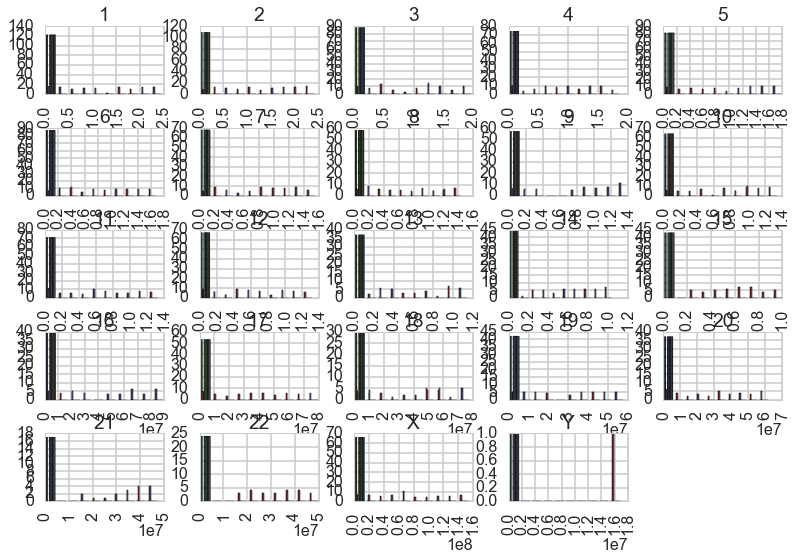

In [74]:
dataframe_indep_loci.hist(by=dataframe_indep_loci['chr'])

In [75]:
autosomes_indep_loci = dataframe_indep_loci[dataframe_indep_loci.chr!="X"]
autosomes_indep_loci = autosomes_indep_loci[autosomes_indep_loci.chr!="Y"]
len(autosomes_indep_loci)

1313

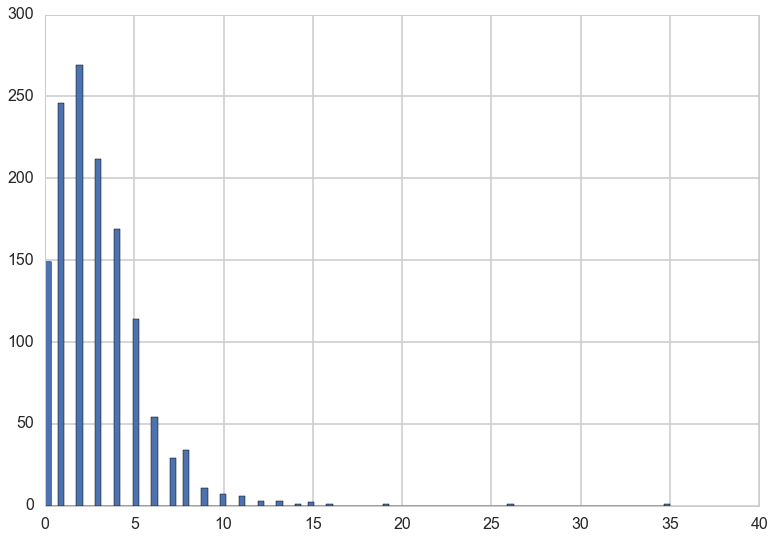

In [76]:
_=plt.hist(autosomes_indep_loci.created_num_muts.values, bins=100)

In [293]:
#We get an estimate of the variance for observed number of mutations from minPt to maxPt
minPt = min(autosomes_indep_loci.created_num_muts.values)
maxPt = max(autosomes_indep_loci.created_num_muts.values)
print minPt, maxPt, 'minPt', 'maxPt'
mx = {i:len(autosomes_indep_loci[autosomes_indep_loci.created_num_muts == i]) for i in range(minPt, maxPt +1)}

def invVar(mx, x):
    if mx[x]>0 and mx[x+1]>0:
        return pow(x+1,2)*pow(float(mx[x+1])/mx[x],2)*(1.0/mx[x] + 1.0 /mx[x+1])
    else:
        return False
    
print [invVar(mx,i) for i in range(minPt,maxPt-1)]
    
print mx
print mx.values()
    
#((z+1)^2*(x^2/y^2)*(1/x + 1/y))^(-1), numWeights, denomWeights, minPt:(maxPt-1)

0 35 minPt maxPt
[0.02937469713106218, 0.03722324056474751, 0.04714836171736824, 0.10812449203033375, 0.16709797300866885, 0.22044029741944884, 0.7490156480211351, 5.6208946656279455, 1.0201251780989216, 9.46656649135988, 27.51603498542274, 18.0, 112.66666666666666, 29.03703703703703, 1350.0, 96.0, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
{0: 149, 1: 246, 2: 269, 3: 212, 4: 169, 5: 114, 6: 54, 7: 29, 8: 34, 9: 11, 10: 7, 11: 6, 12: 3, 13: 3, 14: 1, 15: 2, 16: 1, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 1, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 1}
[149, 246, 269, 212, 169, 114, 54, 29, 34, 11, 7, 6, 3, 3, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [271]:
maxPt

35

In [283]:
#http://scikit-learn.org/stable/auto_examples/plot_isotonic_regression.html

from sklearn.isotonic import IsotonicRegression

ir = IsotonicRegression()

y_ = ir.fit_transform(range(minPt,maxPt), y)

In [282]:
#maybe should just do in R